In [45]:
# Import necessary packages
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
#Create a list with types of genres.
list_of_genres = ['children', 'fantasy', 'action', 'crime', 'drama', 'Sci-Fi', 'adventure', 'biography', 'comedy', 'thriller', 'musical', 'western', 'romance', 'war', 'horror', 'sport', 'history', 'family', 'biography']


In [47]:
#Function that will scrape genre info from IMDB
def get_IMDB_genres(url):
    rg = requests.get(url)
    soup = BeautifulSoup(rg.text, 'html.parser')
#Find movie containers.
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
#Create a for loop to get genre info in each movie container.
    genre_array = []
    for container in movie_containers:
        genres = container.find('span', class_ ='genre')
        if genres:
            genre_array.append(genres.text.strip())
        else:
            genre_array.append('None')
    return genre_array


In [48]:
#Create a function that will return a genre count for each one of the genre types in the genre list.
def get_IMDB_genre_popularity(year):
    url = 'https://www.imdb.com/search/title/?title_type=feature&release_date='+str(year)+'-01-01,'+str(year)+'-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250'
    f = get_IMDB_genres(url)
#for loop that adds 1 to a genre_count each time it encounters it.
    action_count = 0
    for item in f:
        if 'Action' in item:
            action_count += 1
    comedy_count = 0
    for item in f:
        if 'Comedy' in item:
            comedy_count += 1 
    adventure_count = 0
    for item in f:
        if 'Adventure' in item:
            adventure_count += 1
    drama_count = 0
    for item in f:
        if 'Drama' in item:
            drama_count += 1
    romance_count = 0
    for item in f:
        if 'Romance' in item:
            romance_count += 1  
    western_count = 0
    for item in f:
        if 'Western' in item:
            western_count += 1
    thriller_count = 0
    for item in f:
        if 'Thriller' in item:
            thriller_count += 1
    horror_count = 0
    for item in f:
        if 'Horror' in item:
            horror_count += 1
    crime_count = 0
    for item in f:
        if 'Crime' in item:
            crime_count += 1
    scifi_count = 0
    for item in f:
        if 'Sci' in item:
            scifi_count += 1
    family_count = 0
    for item in f:
        if 'Family' in item:
            family_count += 1
    history_count = 0
    for item in f:
        if 'History' in item:
            history_count += 1
    war_count = 0
    for item in f:
        if 'War' in item:
            war_count += 1
    fantasy_count = 0
    for item in f:
        if 'Fantasy' in item:
            fantasy_count += 1
    sport_count = 0
    for item in f:
        if 'Sport' in item:
            sport_count += 1
    musical_count = 0
    for item in f:
        if 'Musical' in item:
            musical_count += 1
#create a dictionary with genre type as key and genre count as value.
    genre_counts = {'fantasy':fantasy_count,
                    'action':action_count,
                    'crime':crime_count,
                    'drama':drama_count,
                    'Sci-Fi':scifi_count,
                    'adventure':adventure_count,
                    'comedy':comedy_count,
                    'thriller':thriller_count,
                    'musical':musical_count,
                    'western':western_count,
                    'romance':romance_count,
                    'war':war_count,
                    'horror':horror_count,
                    'sport':sport_count,
                    'history':history_count,
                    'family':family_count }
#turn dictionary into a data frame.
    df_to_plot = pd.DataFrame(genre_counts.items(), columns=['Genres', 'Genre_count'])
#add a year column
    years = [year]*len(df_to_plot)
    df_to_plot['year'] = years
    return df_to_plot
#df = get_IMDB_genre_popularity(2015)
#df


In [ ]:
#Use a for loop to get a data frame for each year and use concat to add them together
pieces = []
for year in [*range(1950,2020,1)]:
    df= get_IMDB_genre_popularity(year)
    pieces.append(df)
df_all = pd.concat(pieces)
df_all

In [8]:
#turn data frame into csv file to store it 
df_all.to_csv('genre_popularity.csv', index=False, header = True)

In [9]:
#check if you have everything
len(df_all)

1120

In [10]:
#using sqlite3 create a database to organize list
import sqlite3
#create data base genres.db
conn = sqlite3.connect('genres.db')
#add df_all to our previously created database.
df_all.to_sql('Genres', conn, if_exists='replace', index=False)
pd.read_sql('Select * from Genres', conn)

,Genres,Genre_count,year
0,fantasy,1,1950
1,action,91,1950
2,crime,63,1950
3,drama,95,1950
4,Sci-Fi,0,1950
...,...,...,...
1115,war,0,2019
1116,horror,48,2019
1117,sport,1,2019
1118,history,3,2019


In [11]:
#commit the changes to our empty database
conn.commit()

In [12]:
cur = conn.cursor()

In [13]:
#Pull a data frame with the evolution of a certain type of genre in time
#use groupby to get a data frame with information about fantasy genre
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'fantasy';""")
df_fantasy = pd.DataFrame(cur.fetchall())
df_fantasy.columns = [x[0] for x in cur.description]

In [ ]:
#df_fantasy

In [ ]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'action';""")
df_action = pd.DataFrame(cur.fetchall())
df_action.columns = [x[0] for x in cur.description]
#df_action

In [ ]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'crime';""")
df_crime = pd.DataFrame(cur.fetchall())
df_crime.columns = [x[0] for x in cur.description]
#df_crime

In [17]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'drama';""")
df_drama = pd.DataFrame(cur.fetchall())
df_drama.columns = [x[0] for x in cur.description]
#df_drama

,Genres,Genre_count,year
0,drama,95,1950
1,drama,104,1951
2,drama,93,1952
3,drama,104,1953
4,drama,119,1954
...,...,...,...
65,drama,126,2015
66,drama,123,2016
67,drama,119,2017
68,drama,102,2018


In [18]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'Sci-Fi';""")
df_SciFi = pd.DataFrame(cur.fetchall())
df_SciFi.columns = [x[0] for x in cur.description]
#df_SciFi

,Genres,Genre_count,year
0,Sci-Fi,0,1950
1,Sci-Fi,3,1951
2,Sci-Fi,4,1952
3,Sci-Fi,7,1953
4,Sci-Fi,13,1954
...,...,...,...
65,Sci-Fi,12,2015
66,Sci-Fi,8,2016
67,Sci-Fi,11,2017
68,Sci-Fi,9,2018


In [19]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'adventure';""")
df_adventure = pd.DataFrame(cur.fetchall())
df_adventure.columns = [x[0] for x in cur.description]
#df_adventure

,Genres,Genre_count,year
0,adventure,77,1950
1,adventure,55,1951
2,adventure,67,1952
3,adventure,69,1953
4,adventure,61,1954
...,...,...,...
65,adventure,13,2015
66,adventure,13,2016
67,adventure,12,2017
68,adventure,14,2018


In [20]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'comedy';""")
df_comedy = pd.DataFrame(cur.fetchall())
df_comedy.columns = [x[0] for x in cur.description]
#df_comedy

,Genres,Genre_count,year
0,comedy,57,1950
1,comedy,62,1951
2,comedy,65,1952
3,comedy,52,1953
4,comedy,36,1954
...,...,...,...
65,comedy,89,2015
66,comedy,62,2016
67,comedy,64,2017
68,comedy,83,2018


In [21]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'thriller';""")
df_thriller = pd.DataFrame(cur.fetchall())
df_thriller.columns = [x[0] for x in cur.description]
#df_thriller

,Genres,Genre_count,year
0,thriller,4,1950
1,thriller,8,1951
2,thriller,7,1952
3,thriller,5,1953
4,thriller,7,1954
...,...,...,...
65,thriller,29,2015
66,thriller,39,2016
67,thriller,31,2017
68,thriller,30,2018


In [22]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'musical';""")
df_musical = pd.DataFrame(cur.fetchall())
df_musical.columns = [x[0] for x in cur.description]
#df_musical

,Genres,Genre_count,year
0,musical,16,1950
1,musical,11,1951
2,musical,18,1952
3,musical,24,1953
4,musical,16,1954
...,...,...,...
65,musical,4,2015
66,musical,4,2016
67,musical,3,2017
68,musical,1,2018


In [23]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'western';""")
df_western = pd.DataFrame(cur.fetchall())
df_western.columns = [x[0] for x in cur.description]
#df_western

,Genres,Genre_count,year
0,western,64,1950
1,western,66,1951
2,western,66,1952
3,western,56,1953
4,western,52,1954
...,...,...,...
65,western,2,2015
66,western,1,2016
67,western,0,2017
68,western,3,2018


In [24]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'romance';""")
df_romance = pd.DataFrame(cur.fetchall())
df_romance.columns = [x[0] for x in cur.description]
#df_romance

,Genres,Genre_count,year
0,romance,31,1950
1,romance,44,1951
2,romance,39,1952
3,romance,42,1953
4,romance,48,1954
...,...,...,...
65,romance,18,2015
66,romance,14,2016
67,romance,9,2017
68,romance,16,2018


In [25]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'war';""")
df_war = pd.DataFrame(cur.fetchall())
df_war.columns = [x[0] for x in cur.description]
#df_war

,Genres,Genre_count,year
0,war,5,1950
1,war,10,1951
2,war,13,1952
3,war,19,1953
4,war,12,1954
...,...,...,...
65,war,0,2015
66,war,0,2016
67,war,0,2017
68,war,4,2018


In [26]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'horror';""")
df_horror = pd.DataFrame(cur.fetchall())
df_horror.columns = [x[0] for x in cur.description]
#df_horror

,Genres,Genre_count,year
0,horror,0,1950
1,horror,1,1951
2,horror,1,1952
3,horror,2,1953
4,horror,7,1954
...,...,...,...
65,horror,38,2015
66,horror,49,2016
67,horror,41,2017
68,horror,35,2018


In [27]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'sport';""")
df_sport = pd.DataFrame(cur.fetchall())
df_sport.columns = [x[0] for x in cur.description]
#df_sport

,Genres,Genre_count,year
0,sport,9,1950
1,sport,11,1951
2,sport,7,1952
3,sport,6,1953
4,sport,3,1954
...,...,...,...
65,sport,1,2015
66,sport,2,2016
67,sport,2,2017
68,sport,1,2018


In [28]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'history';""")
df_history = pd.DataFrame(cur.fetchall())
df_history.columns = [x[0] for x in cur.description]
#df_history

,Genres,Genre_count,year
0,history,5,1950
1,history,4,1951
2,history,12,1952
3,history,6,1953
4,history,15,1954
...,...,...,...
65,history,2,2015
66,history,4,2016
67,history,1,2017
68,history,1,2018


In [29]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'family';""")
df_family = pd.DataFrame(cur.fetchall())
df_family.columns = [x[0] for x in cur.description]
#df_family

,Genres,Genre_count,year
0,family,2,1950
1,family,1,1951
2,family,1,1952
3,family,6,1953
4,family,5,1954
...,...,...,...
65,family,9,2015
66,family,7,2016
67,family,9,2017
68,family,12,2018


In [30]:
x_values=[*range(1950,2020)]
y_values = [150]*70


<Figure size 432x288 with 0 Axes>

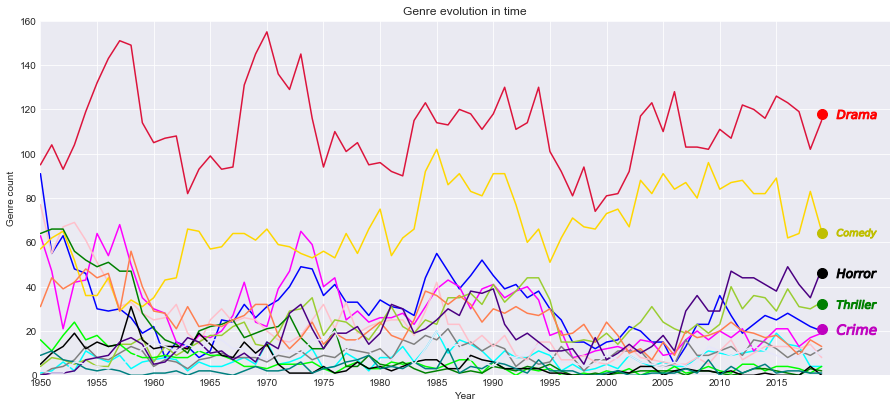

In [44]:
#plot all genres on one graph
new_figure = plt.figure()
plt.figure(figsize=(70,30))
plt.style.use('seaborn-darkgrid')
#ax=new_figure.add_subplot(111)
ax1 = plt.subplot(4,4,1)
ax1.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'aqua', linestyle='-')
ax1.plot(df_action['year'], df_action['Genre_count'], color = 'blue', linestyle = '-')
ax1.plot(df_crime['year'], df_crime['Genre_count'], color = 'magenta', linestyle = '-')
symbol5='Crime'
ax1.plot(2022, 21,'m', markersize = 40, marker = r"$ {} $".format(symbol5))
ax1.plot(2019, 21,'m', markersize = 10, marker = 'o')
ax1.plot(df_drama['year'], df_drama['Genre_count'], color = 'crimson', linestyle = '-')
symbol1='Drama'
ax1.plot(2022, 118,'r', markersize = 40, marker = r"$ {} $".format(symbol1))
ax1.plot(2019, 118,'r', markersize = 10, marker = 'o')
ax1.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'pink', linestyle = '-')
ax1.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'gold', linestyle = '-')
symbol2='Comedy'
ax1.plot(2022, 64,'y', markersize = 40, marker = r"$ {} $".format(symbol2))
ax1.plot(2019, 64,'y', markersize = 10, marker = 'o')
ax1.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'yellowgreen', linestyle = '-')
symbol4='Thriller'
ax1.plot(2022, 32,'g', markersize = 40, marker = r"$ {} $".format(symbol4))
ax1.plot(2019, 32,'g', markersize = 10, marker = 'o')
ax1.plot(df_musical['year'], df_musical['Genre_count'], color = 'lime', linestyle = '-')
ax1.plot(df_western['year'], df_western['Genre_count'], color = 'green', linestyle = '-')
ax1.plot(df_romance['year'], df_romance['Genre_count'], color = 'coral', linestyle = '-')
ax1.plot(df_war['year'], df_war['Genre_count'], color = 'black', linestyle = '-')
ax1.plot(df_horror['year'], df_horror['Genre_count'], color = 'indigo', linestyle = '-')
symbol3='Horror'
ax1.plot(2022, 46,'k', markersize = 40, marker = r"$ {} $".format(symbol3))
ax1.plot(2019, 46,'k', markersize = 10, marker = 'o')
ax1.plot(df_sport['year'], df_sport['Genre_count'], color = 'teal', linestyle = '-')
ax1.plot(df_family['year'], df_family['Genre_count'], color = 'lavender', linestyle = '-')
ax1.hist(x_values, y_values, color = 'silver')
ax1.set_xlim(1950, 2025) 
ax1.set_ylim(0,160)
ax1.set_xticks([*range(1950,2020,5)])
ax1.set_xlabel('Year')
ax1.set_ylabel('Genre count')
ax1.set_title('Genre evolution in time')
plt.show()

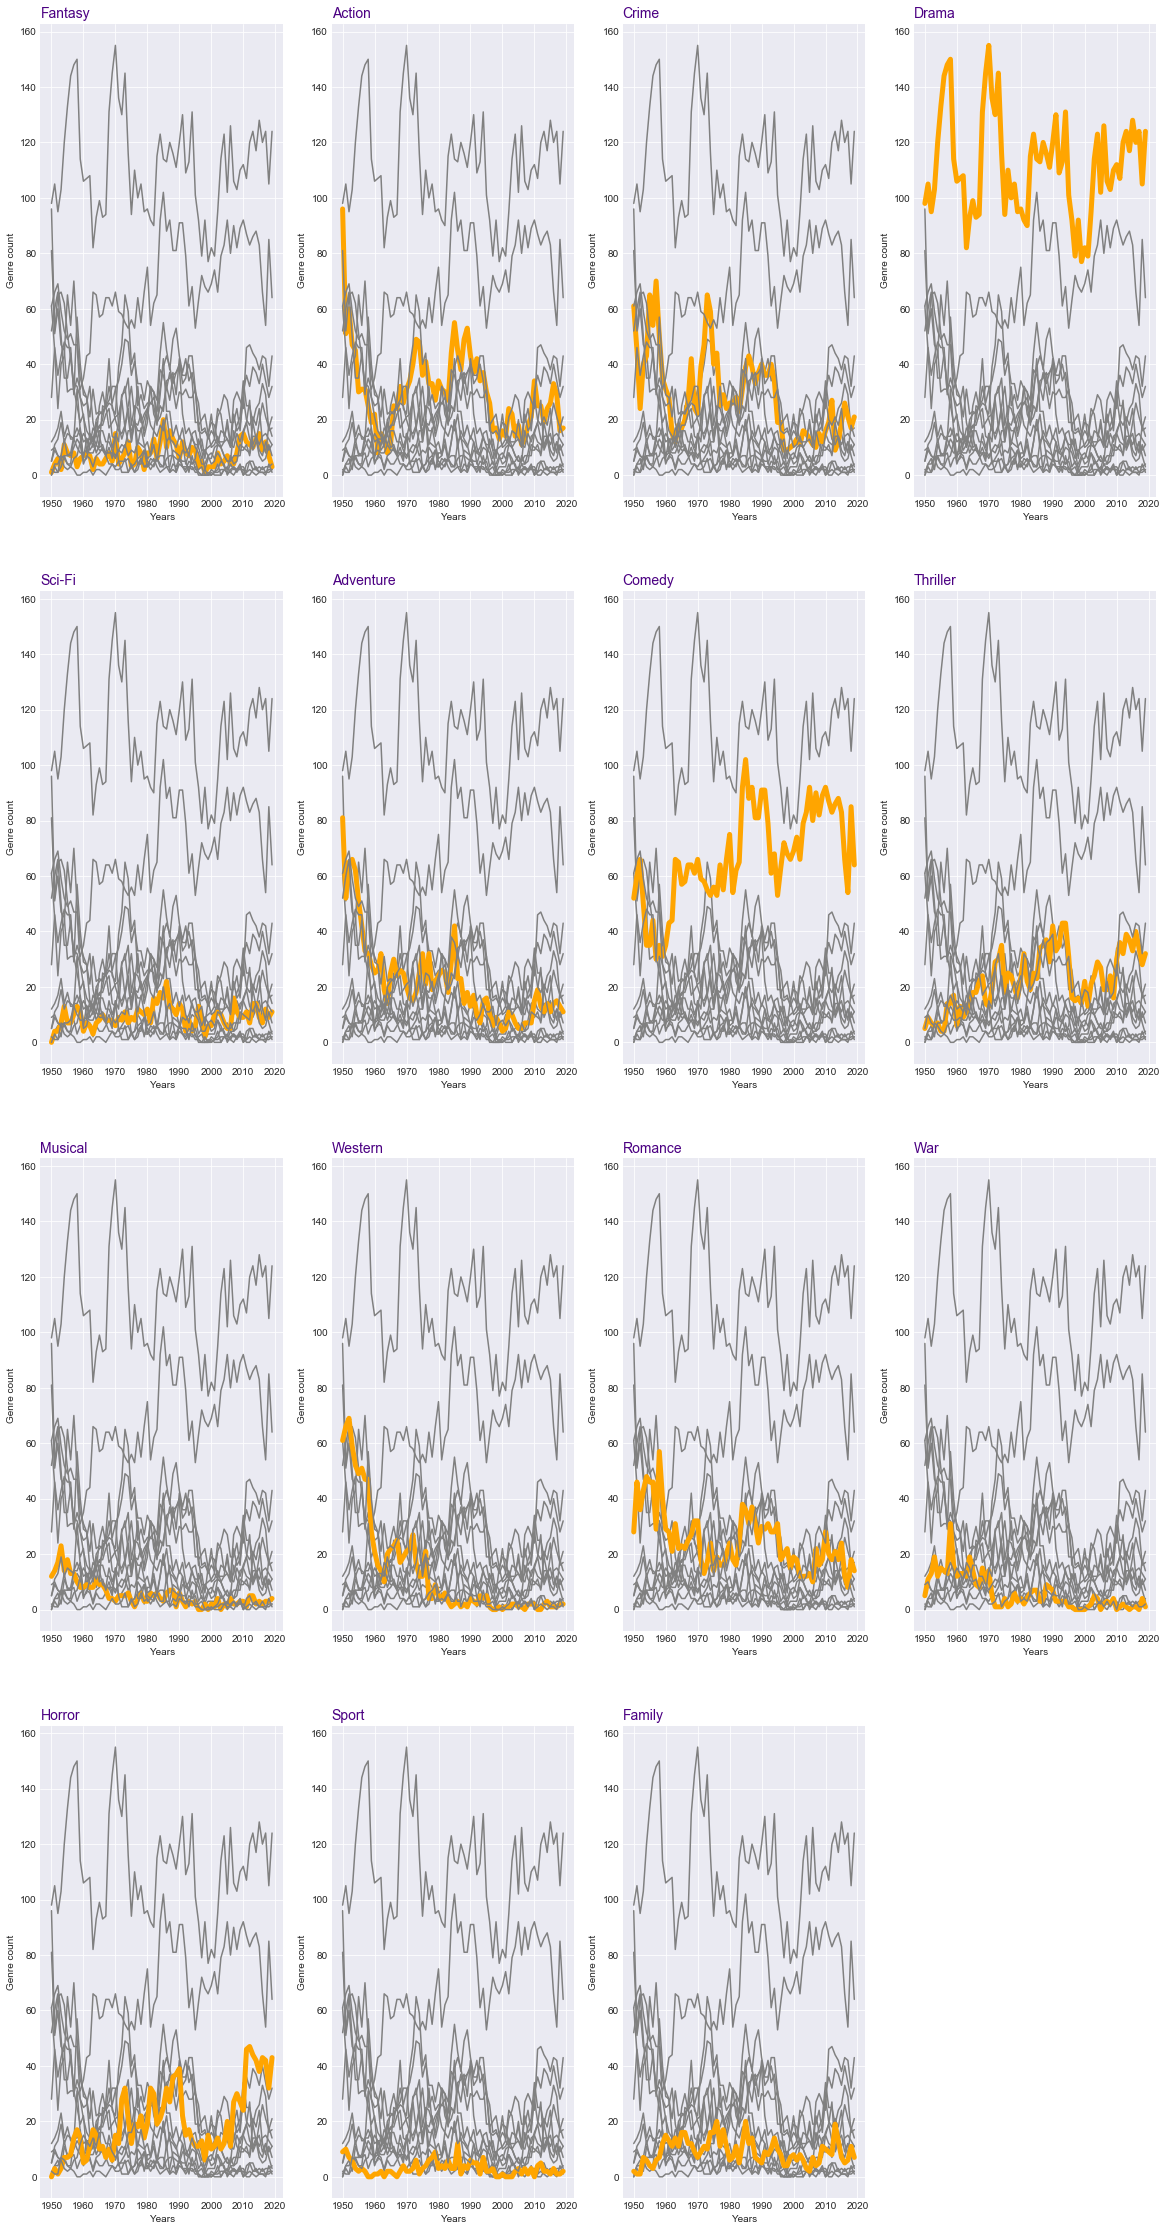

In [158]:
#plot each one of the genres with a diffrent color but keep the rest in grey for comparison.
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
plt.style.use('seaborn-darkgrid')
ax1 = plt.subplot(4,4,1)
ax1.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'orange', linestyle='-', linewidth=5)
ax1.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax1.set_title('Fantasy', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")

ax2 = plt.subplot(4,4,2)
ax2.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax2.plot(df_action['year'], df_action['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax2.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax2.set_title('Action', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax3=plt.subplot(4,4,3)
ax3.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax3.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_crime['year'], df_crime['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax3.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax3.set_title('Crime', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax4 =plt.subplot(4,4,4)
ax4.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax4.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_drama['year'], df_drama['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax4.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax4.set_title('Drama', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax5 =plt.subplot(4,4,5)
ax5.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax5.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax5.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax5.set_title('Sci-Fi', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax6 =plt.subplot(4,4,6)
ax6.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax6.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax6.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax6.set_title('Adventure', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax7=plt.subplot(4,4,7)
ax7.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax7.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax7.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax7.set_title('Comedy', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax8=plt.subplot(4,4,8)
ax8.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax8.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax8.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax8.set_title('Thriller', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax9=plt.subplot(4,4,9)
ax9.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax9.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_musical['year'], df_musical['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax9.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax9.set_title('Musical', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax10 = plt.subplot(4,4,10)
ax10.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax10.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_western['year'], df_western['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax10.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax10.set_title('Western', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax11=plt.subplot(4,4,11)
ax11.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax11.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_romance['year'], df_romance['Genre_count'], color = 'orange', linestyle = '-' , linewidth=5)
ax11.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax11.set_title('Romance', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax12=plt.subplot(4,4,12)
ax12.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax12.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_war['year'], df_war['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax12.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax12.set_title('War', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax13=plt.subplot(4,4,13)
ax13.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax13.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_horror['year'], df_horror['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax13.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax13.set_title('Horror', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax14=plt.subplot(4,4,14)
ax14.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax14.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_sport['year'], df_sport['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax14.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax14.set_title('Sport', loc='left', fontsize=14, fontweight=0, color='indigo')

plt.xlabel("Years")
plt.ylabel("Genre count")
ax15=plt.subplot(4,4,15)
ax15.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax15.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_family['year'], df_family['Genre_count'], color = 'orange', linestyle = '-', linewidth=5)
ax15.set_title('Family', loc='left', fontsize=14, fontweight=0, color='indigo')
ax.set_xlim(1950, 2025) 
ax.set_ylim(0,160)
plt.xlabel("Years")
plt.ylabel("Genre count")
plt.subplots_adjust(wspace=0.2)
#ax.set_xlim(1980, 2020), ax.set_ylim(0,140)
#ax.set_xlabel('Year')
#ax.set_ylabel('Genre count')
ax.set_title('Genre evolution in time')
plt.show()

Text(0, 0.5, 'Genre count')

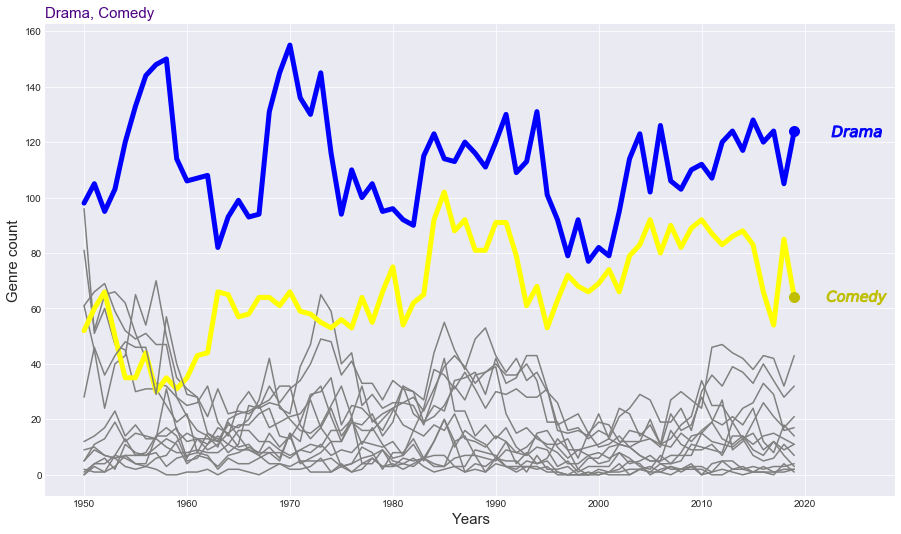

In [157]:
fig = plt.figure(figsize=(70,40))
ax = plt.subplot(1,1,1)
plt.style.use('seaborn-darkgrid')
ax1= plt.subplot(4,4,1)
ax1.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax1.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_drama['year'], df_drama['Genre_count'], color = 'blue', linestyle = '-', linewidth=5)
#add marker for the plot
symbol1='Drama'
ax1.plot(2025, 124,'b', markersize = 50, marker = r"$ {} $".format(symbol1))
ax1.plot(2019, 124,'b', markersize = 10, marker = 'o')
ax1.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'yellow', linestyle = '-', linewidth=5)
#add marker for the plot
symbol2='Comedy'
ax1.plot(2025, 64,'y', markersize = 60, marker = r"$ {} $".format(symbol2))
ax1.plot(2019, 64,'y', markersize = 10, marker = 'o')
ax1.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax1.set_title('Drama, Comedy', loc='left', fontsize=15, fontweight=0, color='indigo')
#ax1.set_xticks([*range(1950, 2020,5)], fontsize = 40)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Genre count", fontsize=15)